# <font color='black'>The Sparks Foundation Internship</font>

# <font color='black'>By :Shreyas Varadkar</font>

# <font color='black'>Task 1 : Prediciton using Supervised Machine Learning</font>

# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In this task I am going to predict the percentage of a student on the no. of study hours

Importing Libraries

In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing Dataset

In [11]:
url = "http://bit.ly/w-data"
sdata = pd.read_csv(url)
print("Data imported successfully")

sdata.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Checking some properties of Dataset

In [7]:
sdata.shape

(25, 2)

In [8]:
sdata.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Checking for missing values

In [9]:
sdata.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
sdata.nunique()

Hours     23
Scores    23
dtype: int64

Visualizing the Data

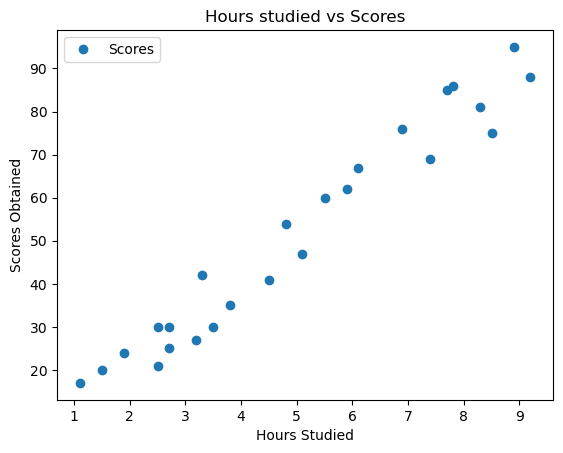

In [12]:
sdata.plot(x = 'Hours',y = 'Scores',style='o')
plt.title('Hours studied vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.show()

We can see here there is a direct relationship with the hours studied and Scores Obtained. We can clearly see there is a positive linear relation, so we can use linear regression algorithm to showcase/predict for the given data.

Preparing the data

In [13]:
#separating into attributes and labels
X = sdata.drop(columns='Scores',axis=1)
y = sdata['Scores']

In [16]:
#attributes
print(X)

    Hours
0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8


In [14]:
#label
print(y)

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [15]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=0)

Training the Data with algorithm

In [16]:
#model training
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

print("Training Complete")

Training Complete


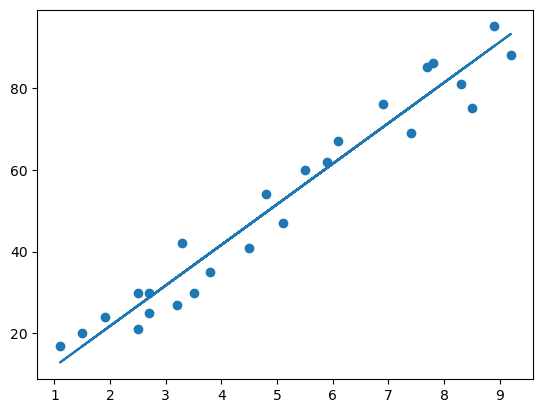

In [17]:
#plotting graph for visual represantation of the regression line
line = regressor.coef_*X+regressor.intercept_
#plotting for the test data
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

Making the Predictions

In [23]:
print(X_test) # Testing data In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [24]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [26]:
#testing the predictions by using the given value
hours = 9.25
prediction = regressor.predict([[hours]])
print("No. of hours studied = {}".format(hours))
print("No. of marks obtained = {}".format(prediction))

No. of hours studied = 9.25
No. of marks obtained = [93.69173249]


C:\Users\SAMPADA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Evaluation

We are checking the error factor of the algorithm here, so as to compare effectiveness between different algorithms.

In [27]:
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_percentage_error(y_test,regressor.predict(X_test)))

Mean Absolute Error:  0.12568891617045663


So there is an error margin of 12.5% for this algorithm on this dataset.Generally, algorithm having lesser percentage should be chosen.